In [1]:
#Seth Hensley
#801055921
#Homework 3

import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.cifar10.load_data()

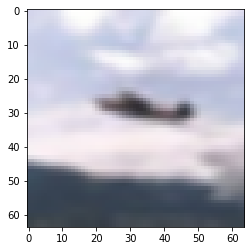

In [2]:
xtrain=tf.image.resize(xtrain,(64,64))
xtest=tf.image.resize(xtest,(64,64))


xtrain = xtrain/255.0

#ytrain = ytrain/255.0

xtest = xtest/255.0

#ytest = ytest/255.0

plt.imshow(xtrain[42069,:,:],cmap='Greys')

In [3]:
def inception(input, c1,c2,c3,c4):

  #branch 1
  b1 = keras.layers.Conv2D(c1,kernel_size = (1,1), activation = "relu")(input)

  #branch 2
  b2= keras.layers.Conv2D(c2[0],kernel_size = (1,1), activation = "relu")(input)
  b2= keras.layers.Conv2D(c2[1],kernel_size = (3,3), padding ="same", activation = "relu")(b2)

  #branch 3
  b3= keras.layers.Conv2D(c3[0],kernel_size = (1,1), activation = "relu")(input)
  b3= keras.layers.Conv2D(c3[1],kernel_size = (5,5), padding ="same", activation = "relu")(b3)

  #branch 4 
  b4= keras.layers.MaxPooling2D((3,3), strides = (1,1), padding ="same")(input)
  b4= keras.layers.Conv2D(c4,kernel_size = (1,1), activation = "relu")(b4)
  
  branchConcat = tf.keras.layers.concatenate([b1,b2,b3,b4], axis = -1 )


  return branchConcat



In [4]:
def b1():
  inShape = tf.keras.Input(shape =(64,64,3))
  model = keras.layers.Conv2D(64, kernel_size=7, strides = 2, activation="relu")(inShape)
  model = keras.layers.MaxPool2D(3, strides=2, padding="same")(model)

  return model

def b2(model):
  inShape = tf.keras.Input(shape =(64,64,3))
  model = keras.layers.Conv2D(64, kernel_size=1, activation="relu")(inShape)
  model = keras.layers.Conv2D(192, 3, padding = "same",activation = "relu")(model)
  model = keras.layers.MaxPool2D(3, strides=2, padding="same")(model)

  return model

def b3(model):
  model = inception(model,64,(96,128),(16,32),32)
  model = inception(model,128,(128,192),(32,96),64)
  model = keras.layers.MaxPool2D(3,2,padding="same")

  return model

def b4(model):
  model = inception(model,192,(96,208),(16,48),64)
  model = inception(model,160,(112,224),(24,64),64)
  model = inception(model,128,(128,256),(24,64),64)
  model = inception(model,112,(144,288),(32,64),64)
  model = inception(model,256,(160,320),(32,128),128)
  model = keras.layers.MaxPool2D(3,2,padding="same")

  return model

def b5(model):
  model = inception(model,256,(160,320),(32,128),128)
  model = inception(model,384,(192,384),(48,128),128)
  model = keras.layers.GlobalAveragePooling2D()(model)
  return model




In [5]:
def googleNet():
  inShape = tf.keras.Input(shape =(64,64,3))
  model = keras.layers.Conv2D(64, kernel_size=7, strides = 2, activation="relu")(inShape)
  model = keras.layers.BatchNormalization()(model)
  model = keras.layers.MaxPool2D(3, strides=2, padding="same")(model)

  model = keras.layers.Conv2D(64, kernel_size=1, activation="relu")(model)
  model = keras.layers.Conv2D(192, 3, padding = "same",activation = "relu")(model)
  model = keras.layers.BatchNormalization()(model)
  model = keras.layers.MaxPooling2D(3, strides=2, padding="same")(model)

  model = inception(model,64,(96,128),(16,32),32)
  model = inception(model,128,(128,192),(32,96),64)
  #model = keras.layers.MaxPooling2D(3,2,padding="same")

  model1 = keras.layers.Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(model)
  model1 = keras.layers.BatchNormalization()(model1)
  model1 = keras.layers.Flatten()(model1)
  model1 = keras.layers.Dense(1024, activation = 'relu')(model1)
  model1 = keras.layers.Dense(10, activation = 'softmax')(model1)

  model = inception(model,192,(96,208),(16,48),64)
  model = inception(model,160,(112,224),(24,64),64)
  model = inception(model,128,(128,256),(24,64),64)
  model = inception(model,112,(144,288),(32,64),64)
  model = inception(model,256,(160,320),(32,128),128)
  #model = keras.layers.MaxPooling2D(3,2,padding="same")

  model2 = keras.layers.Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(model)
  model2 = keras.layers.BatchNormalization()(model2)
  model2 = keras.layers.Flatten()(model2)
  model2 = keras.layers.Dense(1024, activation = 'relu')(model2)
  model2 = keras.layers.Dense(10, activation = 'softmax')(model2)

  model = inception(model,256,(160,320),(32,128),128)
  model = inception(model,384,(192,384),(48,128),128)
  model = keras.layers.GlobalAveragePooling2D()(model)

  model = keras.models.Model(inShape, [model,model1,model2], name= "googleNet")

  return model

In [6]:
googleModel = googleNet()


In [7]:

googleModel.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
#googleModel.summary()

In [8]:
googleModel.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 103s 48ms/step - loss: 4.4746 - global_average_pooling2d_loss: 1.6688 - dense_1_loss: 1.3308 - dense_3_loss: 1.4750 - global_average_pooling2d_accuracy: 0.4020 - dense_1_accuracy: 0.5312 - dense_3_accuracy: 0.4673 - val_loss: 4.5631 - val_global_average_pooling2d_loss: 1.5989 - val_dense_1_loss: 1.4720 - val_dense_3_loss: 1.4923 - val_global_average_pooling2d_accuracy: 0.4271 - val_dense_1_accuracy: 0.5020 - val_dense_3_accuracy: 0.4886
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.9938 - global_average_pooling2d_loss: 1.0919 - dense_1_loss: 0.8990 - dense_3_loss: 1.0029 - global_average_pooling2d_accuracy: 0.6108 - dense_1_accuracy: 0.6835 - dense_3_accuracy: 0.6465 - val_loss: 3.5242 - val_global_average_pooling2d_loss: 1.3029 - val_dense_1_loss: 1.0163 - val_dense_3_loss: 1.2049 - val_global_average_pooling2d_accuracy: 0.5787 - val_dense_1_accuracy: 0.6586 - val_dense_3_accuracy: 0.6177
Epoch 3/10
1563/15